In [1]:
from comet_ml import Experiment
from gc import collect
from torch.cuda import empty_cache
collect()
empty_cache()

In [12]:
"""latest version"""
"""comet and hyper parameters setting"""
import numpy as np
import skimage.transform as trans
import skimage.io as io

import numpy as np 
import os

os.environ["COMET_API_KEY"] = "SMwK2ZOLrycBakJgOz0G1cmHY"
batch_size = 4
test_batch_size = 1
epochs = 10
learning_rate = 1e-4
hyper_params = {
    "batch_size": batch_size,
    "num_epochs": epochs,
    "learning_rate": learning_rate ,
    "test_batch_size" : test_batch_size
}
experiment = Experiment(project_name="chimei_tumor_seg")
experiment.log_parameters(hyper_params)

seed_value= 666
os.environ['PYTHONHASHSEED']=str(seed_value)
np.random.seed(seed_value)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/santaboi/chimei-tumor-seg/14973ce873fe4a2890891e8b5e272b10
COMET INFO:   Parameters:
COMET INFO:     batch_size      : 4
COMET INFO:     learning_rate   : 0.0001
COMET INFO:     num_epochs      : 10
COMET INFO:     test_barch_size : 1
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (293.18 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     os packages              : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `expe

In [3]:
experiment.url

'https://www.comet.ml/santaboi/chimei-tumor-seg/14973ce873fe4a2890891e8b5e272b10'

## Folder List

In [4]:
#cfg file content

"""/home/jf/.local/2d unet/data/PSPF_voc_data"""
#whole brain
non_T1C_data = "./data/PSPF_voc_data/non_PR/T1c/JPEGImages"  
PR_T1C_data = "./data/PSPF_voc_data/PR/T1c/JPEGImages" 

non_T1_data = "./data/PSPF_voc_data/non_PR/T1/JPEGImages" 
PR_T1_data = "./data/PSPF_voc_data/PR/T1/JPEGImages" 

non_Flair_data = "./data/PSPF_voc_data/non_PR/Flair/JPEGImages" 
PR_Flair_data = "./data/PSPF_voc_data/PR/Flair/JPEGImages" 

non_T2_data = "./data/PSPF_voc_data/non_PR/T2/JPEGImages" 
PR_T2_data = "./data/PSPF_voc_data/PR/T2/JPEGImages" 
#mask (ground truth)
non_T1C_target = "./data/PSPF_voc_data/non_PR/T1c/SegmentationClassPNG"
PR_T1C_target = "./data/PSPF_voc_data/PR/T1c/SegmentationClassPNG"

non_T1_target = "./data/PSPF_voc_data/non_PR/T1/SegmentationClassPNG"
PR_T1_target = "./data/PSPF_voc_data/PR/T1/SegmentationClassPNG"

non_Flair_target = "./data/PSPF_voc_data/non_PR/Flair/SegmentationClassPNG" 
PR_Flair_target = "./data/PSPF_voc_data/PR/Flair/SegmentationClassPNG"

non_T2_target = "./data/PSPF_voc_data/non_PR/T2/SegmentationClassPNG" 
PR_T2_target = "./data/PSPF_voc_data/PR/T2/SegmentationClassPNG"

In [5]:
"""load data"""
################## use only T1c data ####################################

#patients in data_folcder is cinsistent with traget_folder
non_name_set = set()
PR_name_set = set()
name_set = set()
total_data_path = [non_T1C_data , non_T1_data , non_Flair_data , non_T2_data , PR_T1C_data , PR_T1_data , PR_Flair_data  , PR_T2_data]
T1c_data_path = [PR_T1C_data , non_T1C_data]
count1 = 0

"""for 4 type"""
"""for folder_name in total_data_path :
    for name in os.listdir(folder_name) :
        name = name.strip('.jpg').strip('.json')
        if name == 'ipynb_checkpoint' :
            continue
        name_set.add(name)
        if count1 <= 3 :
            non_name_set.add(name)
        else :
            PR_name_set.add(name)
    count1 += 1"""

""" for t1c """
non_list = []
for files1  in os.listdir(PR_T1C_data):
    files1 = files1.strip('.jpg').strip('.json')
    if files1 != 'ipynb_checkpoint' :
        PR_name_set.add(files1)    
for files2 in os.listdir(non_T1C_data):
    files2 = files2.strip('.jpg').strip('.json')
    if files2 != 'ipynb_checkpoint' :
        non_name_set.add(files2)
print(len(PR_name_set))
print(len(non_name_set))


13
43


In [6]:
total_data_list = []
total_target_list =[] 
for non_name  in non_name_set  :
    non_name1 = non_name + ".jpg"
    non_name2 = non_name + ".png"
    total_data_list.append(os.path.join(non_T1C_data , non_name1))
    total_target_list.append(os.path.join(non_T1C_target , non_name2))
    
    
   
for i , pr_name in enumerate(PR_name_set) :
    insert_index = 2*i % len(total_data_list)
    #print(insert_index)
    pr_name1 = pr_name + ".jpg"
    pr_name2 = pr_name + ".png"
    total_data_list.insert(insert_index , os.path.join(PR_T1C_data , pr_name1))
    total_target_list.insert(insert_index , os.path.join(PR_T1C_target , pr_name2))
    #total_data_list.append(os.path.join(PR_T1C_data , pr_name1))
    #total_target_list.append(os.path.join(PR_T1C_target , pr_name2))
    
#print(len(total_data_list))
#print(total_data_list)
#print(total_target_list)

In [7]:
train_data_list = total_data_list[0 : int(len(total_data_list)*0.9)] #90%data
train_target_list =  total_target_list[0 : int(len(total_target_list)*0.9) ] #90%target

test_data_list = total_data_list[int(len(total_data_list)*0.9) : len(total_data_list)] #90%data
test_target_list = total_target_list[int(len(total_target_list)*0.9) : len(total_target_list)] #90%target

"""val_img = train_data_list[0 : int(0.2* len(train_data_list))]
val_lbl = train_target_list[0 : int(0.2* len(train_target_list))]
train_data_list = train_data_list[int(0.2* len(train_data_list)) : ]
train_target_list = train_target_list[int(0.2* len(train_target_list)) : ]"""
print(len(train_data_list))
print(len(train_target_list))
print(len(test_data_list))
print(len(test_target_list))
#print(len(val_img))
#print(len(val_lbl))

50
50
6
6


## Data Preprocess

In [8]:
"""for global use"""
x_mean1 , x_mean2 , x_mean3 = 0 , 0 , 0
x_std1 , x_std2 , x_std3 = 0 , 0 , 0

In [13]:
import numpy as np
import torch
from torch.utils.data import DataLoader , Dataset 

import matplotlib.pyplot as plt
import cv2
import torchvision.transforms as T 
from torchvision.transforms.functional import hflip , vflip


class Total_dataset(Dataset):
    def __init__(self, inputs: list, targets: list, transform=None) -> None:
        super().__init__()
        self.inputs = inputs
        self.targets = targets
        self.transform = transform
    
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self , index : int  , transform = None):
        global x_mean1 , x_mean2 , x_mean3 , x_std1 , x_std2 , x_std3 
        input_img = self.inputs[index]
        target_img = self.targets[index]
        
        x_data , y_data = cv2.imread(input_img) , cv2.imread(target_img)
        
        #resize
        if x_data.shape != (512 , 512 , 3) :
            x_data = cv2.resize(x_data , (512 , 512))
        if y_data.shape != (512 , 512 , 3) :
            y_data = cv2.resize(y_data , (512 ,512))

        # turn to torch (typecasting)

        #data augmentaion if true
        if self.transform != None : 
            #x_data , y_data = self.transform(x_data , y_data)
            for t in self.transform :
                if t == "T.Normalize([1 , 1 , 1] , [1 , 1 , 1])" :
                    #normalize with whole T1c dataset
                    img_normalize = T.Normalize([x_mean1 , x_mean2 , x_mean3] , [x_std1 , x_std2 , x_std3])
                    x_data = img_normalize(x_data)
                    pass
                elif t == "T.RandomHorizontalFlip(p=1)" :
                    if torch.rand(1)< 0.5 :
                        x_data = hflip(x_data)
                        y_data = hflip(y_data)
                elif t == "T.RandomVerticalFlip(p=1)" :
                    if torch.rand(1)< 0.5 :
                        x_data = vflip(x_data)
                        y_data = vflip(y_data)
                        

                elif t == "T.RandomRotation(degrees=(360 , 360))" : 
                    if torch.rand(1)< 0.5 :
                        angle = int(torch.rand(1)*360)
                        rotate_funct = T.RandomRotation(degrees=(angle, angle))
                        x_data = rotate_funct(x_data)
                        y_data = rotate_funct(y_data)
                else :
                    x_data = t(x_data)
                    y_data =t(y_data)
                
        #x_data, y_data = torch.from_numpy(x_data).type(torch.float32), torch.from_numpy(y_data).type(torch.float32)
        #x_data = torch.permute(x_data , (1, 2 , 0))
        #y_data = torch.permute(y_data , (1 , 2 , 0))
        y_data = y_data[2, : , :] #edit to the last channel
        y_data = np.expand_dims( y_data, axis= 0) #(512 512) -> (512 512 1)
        return x_data , y_data  #torch

In [14]:
"""whole t1c dateset_wise normalized calculation"""
#total dataset
total_dataset = Total_dataset(train_data_list ,
                              train_target_list,
                              transform= [T.ToTensor()]
)
print(len(total_dataset))
total_dataloader = DataLoader(total_dataset , batch_size= len(total_dataset) , shuffle= False)
#total_dataloader = DataLoader(total_dataset , batch_size= len(total_data_list) , shuffle= False)

x , y = next(iter(total_dataloader))
print("x_shape", x.shape)
print("y_shape" , y.shape)
x_mean1 = x[0].mean()
x_mean2 = x[1].mean()
x_mean3 = x[2].mean()
x_std1 = x[0].std()
x_std2 = x[1].std()
x_std3 = x[2].std() 
print("x  mean0" ,x_mean1 ) #ch1
print("x  mean1" ,x_mean2 ) #ch2
print("x  mean2" ,x_mean3 ) #ch3
print("x  std0" , x_std1 ) #ch1
print("x  std01" , x_std2 ) #ch2
print("x  std2" , x_std3  ) #ch3 

#img visualize after to_tensor
"""for index in range(5) :
    #cv2.imshow(f"{index}.jpg" , x[index , : , : , :].detach().cpu().numpy())
    #cv2.imshow(f"{index}.png" , y[index , : , : , : ].detach().cpu().numpy())
    plt.imshow(x[index , : , : , :])
    plt.show()
    plt.imshow(y[index , : , : , :])
    plt.show()
"""

50
x_shape torch.Size([50, 3, 512, 512])
y_shape torch.Size([50, 1, 512, 512])
x  mean0 tensor(0.2367)
x  mean1 tensor(0.1622)
x  mean2 tensor(0.1233)
x  std0 tensor(0.2390)
x  std01 tensor(0.1694)
x  std2 tensor(0.1655)


'for index in range(5) :\n    #cv2.imshow(f"{index}.jpg" , x[index , : , : , :].detach().cpu().numpy())\n    #cv2.imshow(f"{index}.png" , y[index , : , : , : ].detach().cpu().numpy())\n    plt.imshow(x[index , : , : , :])\n    plt.show()\n    plt.imshow(y[index , : , : , :])\n    plt.show()\n'

In [15]:
"""data aug"""
normal = "T.Normalize([1 , 1 , 1] , [1 , 1 , 1])"
v_flip = "T.RandomVerticalFlip(p=1)"
h_flip = "T.RandomHorizontalFlip(p=1)"
r_rotate = "T.RandomRotation(degrees=(360 , 360))"
#note : rewrite every probability functions in Total_dataset()
train_dataset = Total_dataset(train_data_list,
                             train_target_list ,
                             transform= [T.ToTensor() ,
                             normal , 
                             v_flip , 
                             h_flip , 
                             r_rotate,
                             T.RandomAutocontrast(p=1) ,
                             ])
                                             
training_dataloader = DataLoader(train_dataset,
                                 batch_size = hyper_params['batch_size'],
                                 shuffle=True)


"""val_dataset = Total_dataset(val_img ,
                            val_lbl ,
                            transform= [ T.ToTensor() , normal , 
                                       # T.RandomAutocontrast(p=1)
                                       ])

val_dataloader = DataLoader(val_dataset,
                                 batch_size=4,
                                 shuffle=True)"""

#, T.RandomAutocontrast(p=1)
test_dataset = Total_dataset(test_data_list ,
                            test_target_list ,
                            transform= [ T.ToTensor() , normal])

testing_dataloader = DataLoader(test_dataset,
                                 batch_size= hyper_params["test_batch_size"] ,
                                 shuffle=True)


#train_x, train_y = next(iter(training_dataloader))

## Model

In [16]:
import torch.nn as nn
import torch.functional as F


class UNET2D(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.CONV1 = nn.Conv2d(3 , 64 , 3 , padding=(1, 1))#conv9
        self.CONV1_2 = nn.Conv2d(64 , 64 , 3 , padding=(1, 1))#conv9
        self.CONV2 = nn.Conv2d(64 , 128 , 3 , padding=(1, 1))#conv8
        self.CONV2_2 = nn.Conv2d(128 , 128 , 3 , padding=(1, 1))#conv8
        self.CONV3 = nn.Conv2d(128 , 256 , 3 , padding=(1, 1))#conv7
        self.CONV3_2 = nn.Conv2d(256 , 256 , 3 , padding=(1, 1))#conv7
        self.CONV4 = nn.Conv2d(256 , 512 , 3  , padding=(1, 1))#conv6
        self.CONV4_2 = nn.Conv2d(512 , 512 , 3  , padding=(1, 1))#conv6
        self.CONV5 = nn.Conv2d(512 , 1024 , 3 , padding=(1, 1))
        self.CONV5_2 = nn.Conv2d(1024 , 1024 , 3 , padding=(1, 1))
        self.CONV9_1 = nn.Conv2d(64 , 2 , 3 , padding=(1, 1))
        self.CONV9_2 = nn.Conv2d(2 , 1 , 1) #use sigmoid as activation
        self.POOL = nn.MaxPool2d(2, 2)
        self.DROP = nn.Dropout2d(p = 0.5)
        self.UP = nn.Upsample(scale_factor=2, mode='nearest')
        self.CONV5R = nn.Conv2d(1024 , 512 , 2 , padding="same")
        self.CONV5R_1 = nn.Conv2d(1024 , 512 , 3 , padding="same")
        self.CONV5R_2 = nn.Conv2d(512 , 512 , 3 , padding="same")
        self.CONV2R = nn.Conv2d(512 , 256 , 2 , padding="same")
        self.CONV2R_1 = nn.Conv2d(512 , 256 , 3 , padding="same")
        self.CONV2R_2 = nn.Conv2d(256 , 256 , 3 , padding="same")
        self.CONV3R = nn.Conv2d(256 , 128 , 2 , padding="same")
        self.CONV3R_1 = nn.Conv2d(256 , 128 , 3 , padding="same")
        self.CONV3R_2 = nn.Conv2d(128 , 128 , 3 , padding="same")
        self.CONV_last1 = nn.Conv2d(128 , 64 , 2 , padding="same")
        self.CONV_last2 = nn.Conv2d(128 , 64 , 3 , padding="same")
        self.CONV_last3 = nn.Conv2d(64 , 64 , 3 , padding="same")
        self.CONV_last4 = nn.Conv2d(64 , 2 , 3 , padding="same")
        self.CONV_last5 = nn.Conv2d(2 , 1 , 1 , padding="same")
        self.SIGM = nn.Sigmoid()
    

    def forward(self, input):
        
        """conv1 = nn.ReLU(self.CONV1(input))
        conv1 = nn.ReLU(self.CONV1(conv1))"""
        conv1 = nn.ReLU()(self.CONV1(input))
        conv1 = nn.ReLU()(self.CONV1_2 (conv1))
        pool1 = self.POOL(conv1)
        #print("pool1" , pool1.shape)


        conv2 = nn.ReLU()(self.CONV2(pool1))
        conv2 = nn.ReLU()(self.CONV2_2(conv2))
        pool2 = self.POOL(conv2) 
        #print("pool2" , pool2.shape)


        conv3 = nn.ReLU()(self.CONV3(pool2))
        conv3 = nn.ReLU()(self.CONV3_2(conv3))
        pool3 = self.POOL(conv3)
        #print("pool3" , pool3.shape)

        
        conv4 = nn.ReLU()(self.CONV4(pool3))
        conv4 = nn.ReLU()(self.CONV4_2(conv4))
        drop4 = self.DROP(conv4)
        pool4 = self.POOL(drop4)
        #print("pool4" , pool4.shape)


        conv5 = nn.ReLU()(self.CONV5(pool4))
        conv5 = nn.ReLU()(self.CONV5_2(conv5))
        drop5 = self.DROP(conv5)
        #print("drop5" , drop5.shape)
        #############################################
        up6 = self.CONV5R(self.UP(drop5))
        merge6 = torch.cat((drop4 , up6) , dim = 1)
        #print("merge6" , merge6.shape)
        conv6 = self.CONV5R_1(merge6)
        conv6 = self.CONV5R_2(conv6)
        #print("conv6" , conv6.shape)

        up7 = self.CONV2R(self.UP(conv6))
        merge7 = torch.cat((conv3 , up7) , dim = 1)
        conv7 = self.CONV2R_1(merge7)
        conv7 = self.CONV2R_2(conv7)

        up8 = self.CONV3R(self.UP(conv7))
        merge8 = torch.cat((conv2 , up8) , dim = 1)
        conv8 = self.CONV3R_1(merge8)
        conv8 = self.CONV3R_2(conv8)

        up9 = self.CONV_last1(self.UP(conv8))
        merge9 = torch.cat((conv1 , up9) , dim = 1)
        #merge9 (1, 512, 512, 128)
        conv9 = self.CONV_last2(merge9)
        conv9 = self.CONV_last3(conv9)
        conv9 = self.CONV_last4(conv9)
        temp9 = self.CONV_last5(conv9)
        conv10 = self.SIGM(temp9)
        
        return conv10


unet = UNET2D()
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device1)
#in-place
unet.to(device1)
#unet.cuda()


cuda:0


UNET2D(
  (CONV1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV5_2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV9_1): Conv2d(64, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (CONV9_2): Conv2d(2, 1, kernel_size=(1, 1), stride=(1, 1))
  (POOL): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [17]:
"""test"""
#input torch.Size([32, 3 , 512 , 512])
"""
input = torch.randn(1 , 3 , 512 , 512)
unet.forward_test(input)
"""

'\ninput = torch.randn(1 , 3 , 512 , 512)\nunet.forward_test(input)\n'

# (Training) Loss function and optimizer

In [18]:
#PyTorch (bceloss + diceloss)
#https://www.kaggle.com/bigironsphere/loss-function-library-keras-pytorch
import torch.nn.functional as F
class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        #inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss
        
        return Dice_BCE

In [20]:
from gc import collect
from torch.cuda import empty_cache
collect()
empty_cache()



In [21]:
#### taining one ############
loss_class = DiceBCELoss(weight = None , size_average = True)

import torch.optim as optim
optimizer = optim.Adam(unet.parameters() , lr = hyper_params["learning_rate"])
loss_function = nn.BCELoss()

with experiment.train():
    step = 0
    for epoch in range(hyper_params["num_epochs"]):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(training_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data #batched
            inputs = inputs.to(device1)
            labels = labels.to(device1)
            #print(inputs.shape , labels.shape)
            #print(inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = unet(inputs)
            outputs = outputs.to(device1)
            #loss = loss_function(outputs, labels)
            loss = loss_class.forward(outputs , labels , smooth= 1)
            loss.backward()
            optimizer.step()
            step += 1 
            experiment.log_metric("Loss", loss, step=step)
            #DiceScore =
            #experiment.log_metric("DiceScore" , DiceScore , step = step)

            # print statistics
            if (i + 1)  % 10 == 0:    
                print('Epoch[%d / %d]Step[%d / %5d] loss: %.4f' %
                      (epoch + 1, hyper_params['num_epochs'],  i + 1, len(train_dataset) // hyper_params['batch_size'],  loss.item()))

print('Finished Training')

/home/jf/anaconda3/envs/tumor2/lib/python3.6/site-packages/torch/nn/modules/conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:647.)
  self.padding, self.dilation, self.groups)


Epoch[1 / 10]Step[10 /    12] loss: 1.1366
Epoch[2 / 10]Step[10 /    12] loss: 1.2469
Epoch[3 / 10]Step[10 /    12] loss: 1.0797
Epoch[4 / 10]Step[10 /    12] loss: 0.9473
Epoch[5 / 10]Step[10 /    12] loss: 0.9043
Epoch[6 / 10]Step[10 /    12] loss: 1.0821
Epoch[7 / 10]Step[10 /    12] loss: 0.3004
Epoch[8 / 10]Step[10 /    12] loss: 0.7669
Epoch[9 / 10]Step[10 /    12] loss: 0.5478
Epoch[10 / 10]Step[10 /    12] loss: 0.2478
Finished Training


In [24]:
experiment.log_metric("loss" , loss)

In [22]:
torch.save(unet , "./model/unet_model(1-16add_dice)")

cuda:0


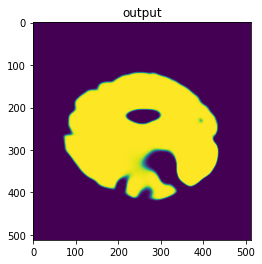

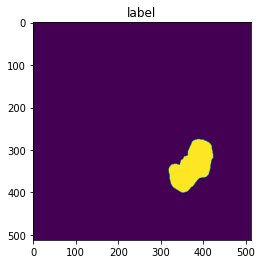

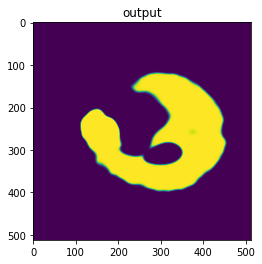

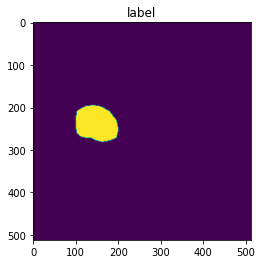

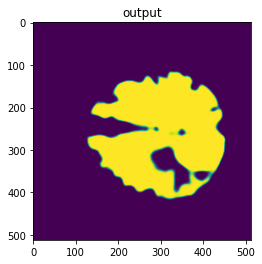

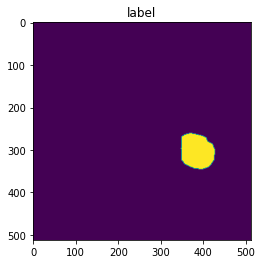

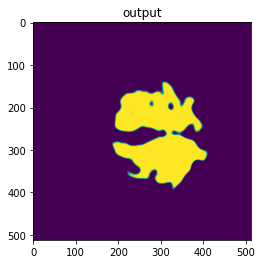

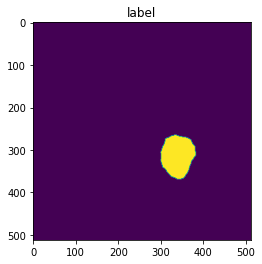

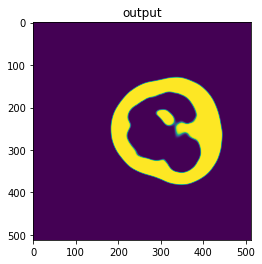

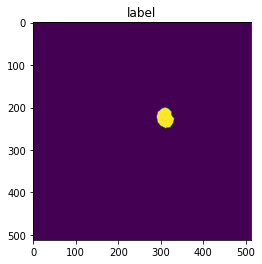

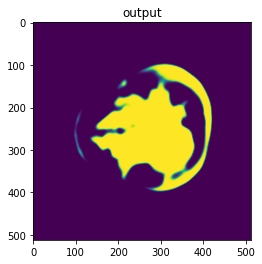

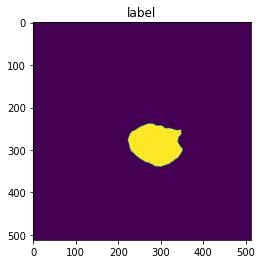

In [23]:
"""import torch
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")"""
print(device1)
%matplotlib inline
model = torch.load("./model/unet_model(1-16add_dice)")
model.to(device1)
for data in testing_dataloader:
    
    inputs, labels = data #batched
    inputs = inputs.to(device1)
    labels = labels.to(device1)
    test_output = model(inputs)
    #print(test_output.cpu().data.numpy())
    test_output = np.squeeze(test_output.cpu().data.numpy() , axis = 0)
    test_output = np.transpose(test_output , (2 , 1 , 0))
    labels = np.squeeze(labels.cpu().data.numpy() , axis = 0)
    labels = np.transpose(labels , (2 , 1 , 0))
    plt.imshow(test_output)
    plt.title("output")
    plt.show()
    plt.imshow(labels)
    plt.title("label")
    plt.show()
    


In [ ]:
##view training file sets ###
## 確認一下training_loader 有沒有沒配對好 ##
## 確認一下到底要不要再加上T.RandomAutocontrast(p=1) ##
## lossfunction 確認一下 方式##
## accuracy 跟 callback function##
## whole dataset normalization 也是怪怪的 ，有沒有好方法可以不要一定餵定值##
%matplotlib inline
for data in training_dataset :
    inputs, labels = data #batched
    